In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [5]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
dataset.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
67,7,8,2012,32,69,16,0,86.5,15.5,48.6,5.5,17.2,8,fire
239,23,9,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire
219,3,9,2012,28,75,16,0,82.2,4.4,24.3,3.3,6,2.5,fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
98,7,9,2012,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6,not fire


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [8]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [9]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
dataset.loc[:122, 'Region']=0
dataset.loc[122:, 'Region']=1
df = dataset

In [11]:
df = df.drop([122, 123])

In [12]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [13]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
59,30,7,2012,31,79,15,0,85.4,28.5,136,4.7,37.4,10.7,fire,0.0
109,18,9,2012,32,49,11,0,89.4,9.8,33.1,6.8,11.3,7.7,fire,0.0
217,1,9,2012,29,86,16,0,37.9,0.9,8.2,0.1,1.4,0,not fire,1.0
203,18,8,2012,37,37,14,0,94.3,35.9,86.8,16,35.9,26.3,fire,1.0
73,13,8,2012,35,63,15,0,87,19,85.1,5.9,24.4,10.2,fire,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.6+ KB


In [15]:
df[['Region']] = df[['Region']].astype('int')

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df = df.dropna().reset_index(drop=True)

In [18]:
df = df.drop(122)

In [19]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [20]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


# Change the required column as integer data Type 

In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


# Change the other column to float datatype

In [29]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [31]:
df.to_csv('Algerian_Forest_Fires_cleaned_dataset.csv', index=False)

# Exploratory Data Analysis

In [32]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)

In [33]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [35]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [36]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [37]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [38]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

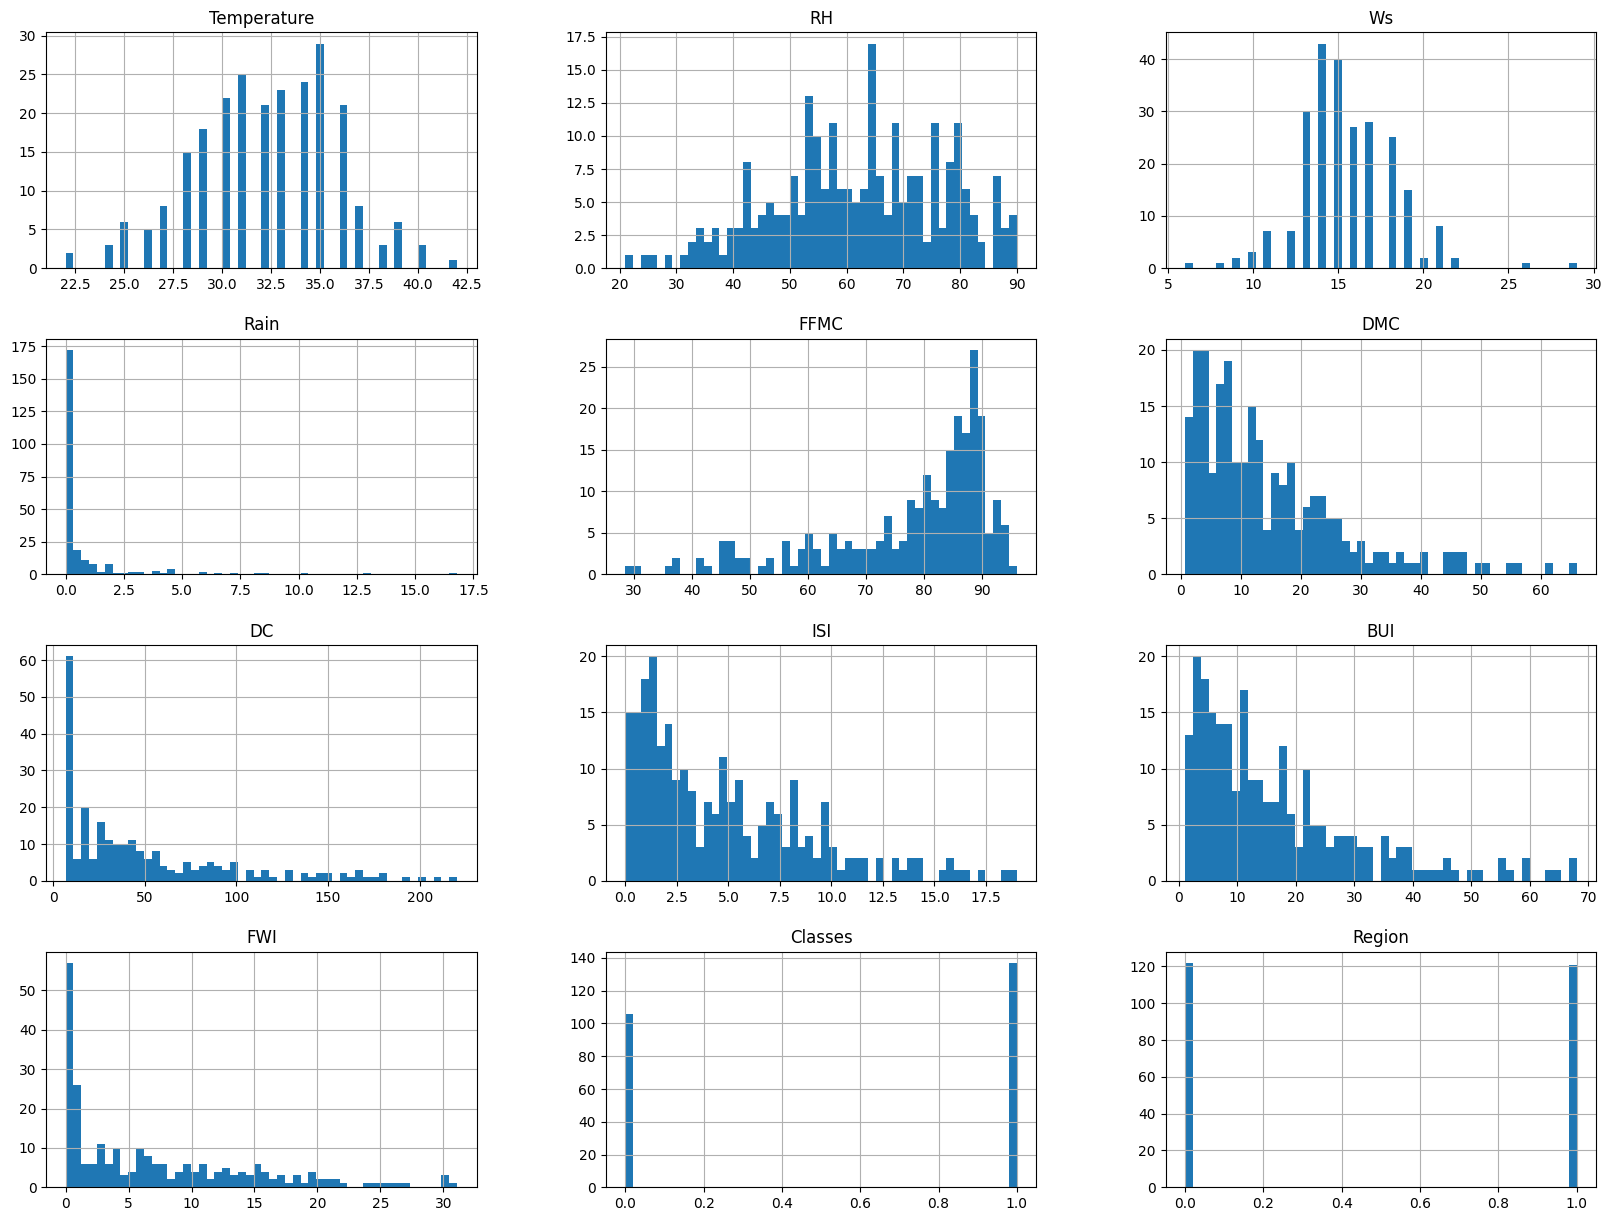

In [39]:
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

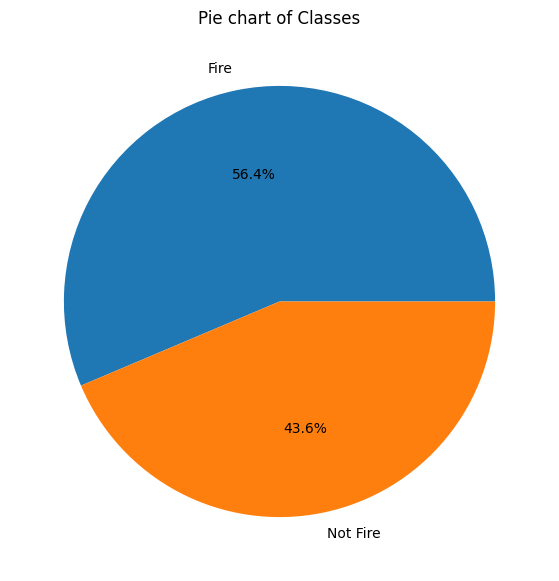

In [41]:
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title('Pie chart of Classes')
plt.show()

In [42]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


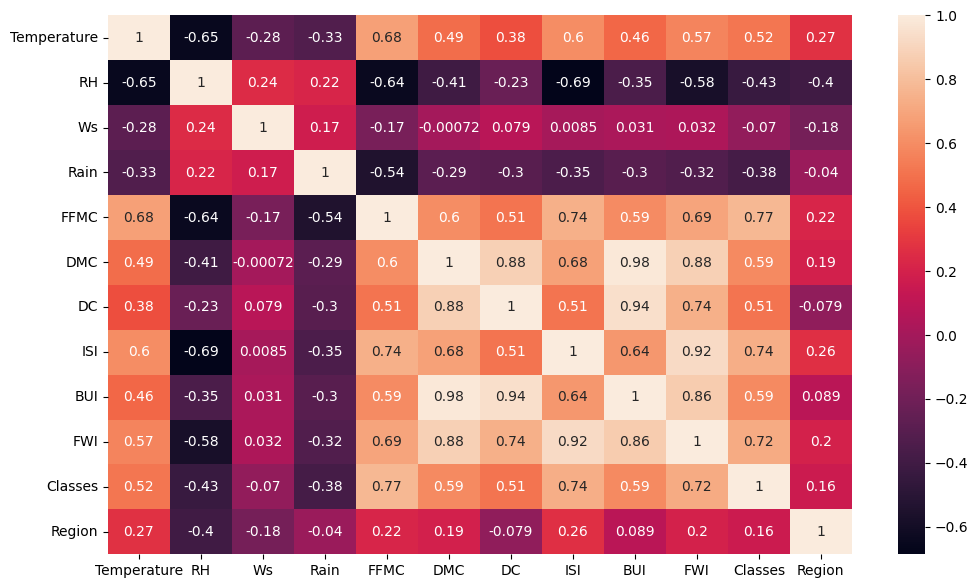

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

<Axes: ylabel='FWI'>

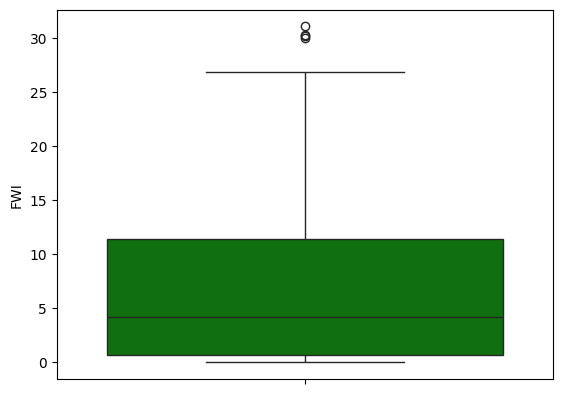

In [44]:
sns.boxplot(df_copy['FWI'], color='g')

In [45]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

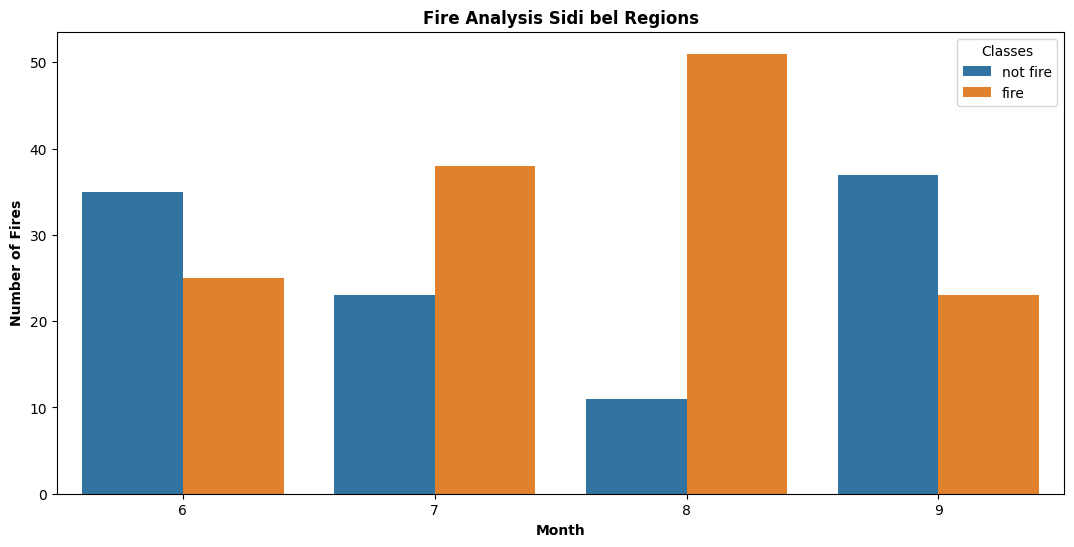

In [46]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Month', weight='bold')
plt.title('Fire Analysis Sidi bel Regions', weight='bold')
plt.show()

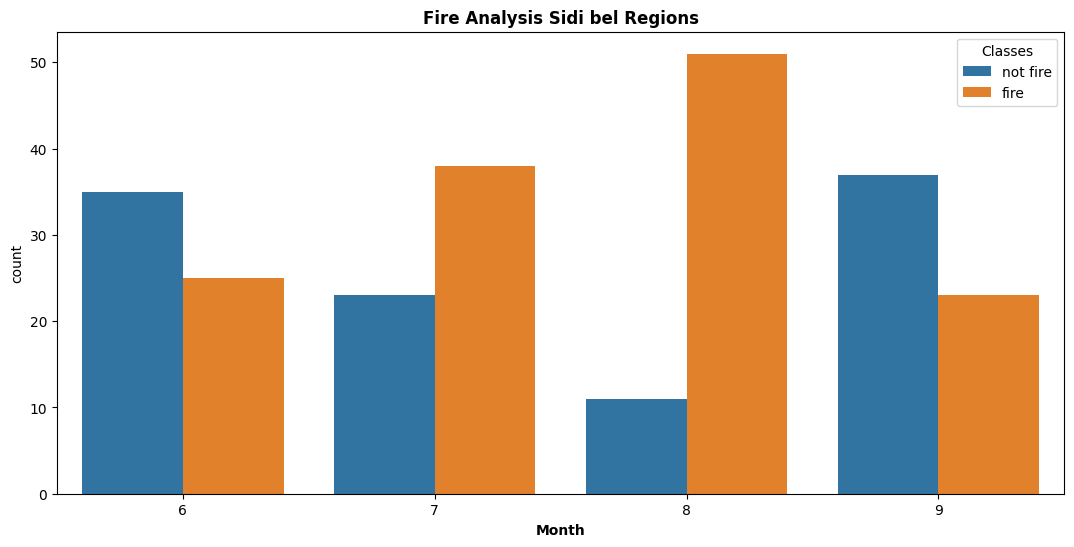

In [47]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes', data=df)
plt.xlabel('Month', weight='bold')
plt.title('Fire Analysis Sidi bel Regions', weight='bold')
plt.show()

In [48]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [49]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 24.7+ KB


In [51]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [53]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),1, 0)

In [54]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [55]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0


In [56]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [58]:
X_train.shape, X_test.shape

((194, 11), (49, 11))

In [59]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656957,-0.257403,-0.335232,0.685635,0.493681,0.409331,0.607424,0.476957,-0.531608,0.246444
RH,-0.656957,1.000000,0.189727,0.214901,-0.648051,-0.418886,-0.245043,-0.686134,-0.368322,0.446870,-0.370195
Ws,-0.257403,0.189727,1.000000,0.184737,-0.141475,0.016477,0.068511,0.054516,0.038304,0.009962,-0.118533
Rain,-0.335232,0.214901,0.184737,1.000000,-0.537996,-0.289123,-0.302638,-0.357214,-0.301873,0.375158,-0.006417
FFMC,0.685635,-0.648051,-0.141475,-0.537996,1.000000,0.599867,0.511770,0.752568,0.591708,-0.762805,0.169071
DMC,0.493681,-0.418886,0.016477,-0.289123,0.599867,1.000000,0.871976,0.701233,0.981911,-0.576028,0.180193
DC,0.409331,-0.245043,0.068511,-0.302638,0.511770,0.871976,1.000000,0.530842,0.939080,-0.508731,-0.085873
ISI,0.607424,-0.686134,0.054516,-0.357214,0.752568,0.701233,0.530842,1.000000,0.669325,-0.755753,0.240565
BUI,0.476957,-0.368322,0.038304,-0.301873,0.591708,0.981911,0.939080,0.669325,1.000000,-0.580451,0.078415
Classes,-0.531608,0.446870,0.009962,0.375158,-0.762805,-0.576028,-0.508731,-0.755753,-0.580451,1.000000,-0.126895


<Axes: >

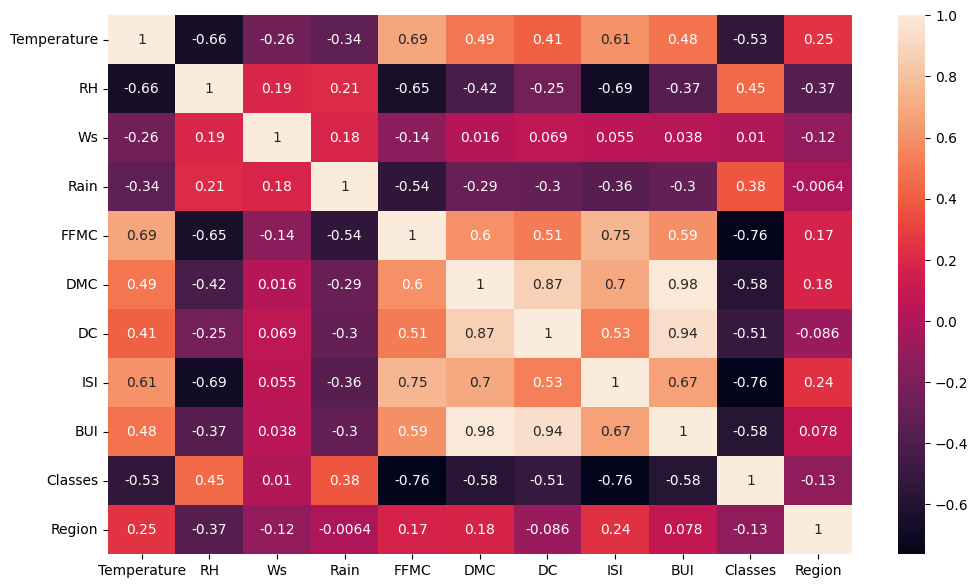

In [60]:
plt.figure(figsize=(12,7))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [61]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
corr_features = correlation(X_train, 0.85)

In [63]:
corr_features

{'BUI', 'DC'}

In [64]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

# Feature Scaling or Standardization

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [66]:
X_train_scaled

array([[ 0.54242424, -1.54663987,  0.89337725, ...,  2.42250357,
        -0.89235436,  1.02083557],
       [ 0.54242424, -0.4452932 ,  0.53380217, ...,  0.01074827,
        -0.89235436,  1.02083557],
       [-0.92727273,  1.20672682, -0.54492305, ..., -1.09463958,
         1.12063105,  1.02083557],
       ...,
       [-0.63333333, -0.72062986, -0.18534798, ..., -0.81829262,
         1.12063105,  1.02083557],
       [ 0.54242424, -0.30762486,  0.89337725, ...,  0.83978915,
        -0.89235436,  1.02083557],
       [ 1.13030303, -0.51412736, -0.90449813, ..., -0.24047625,
        -0.89235436, -0.97958969]])

# Box plot to understand the effect of StandardScaler

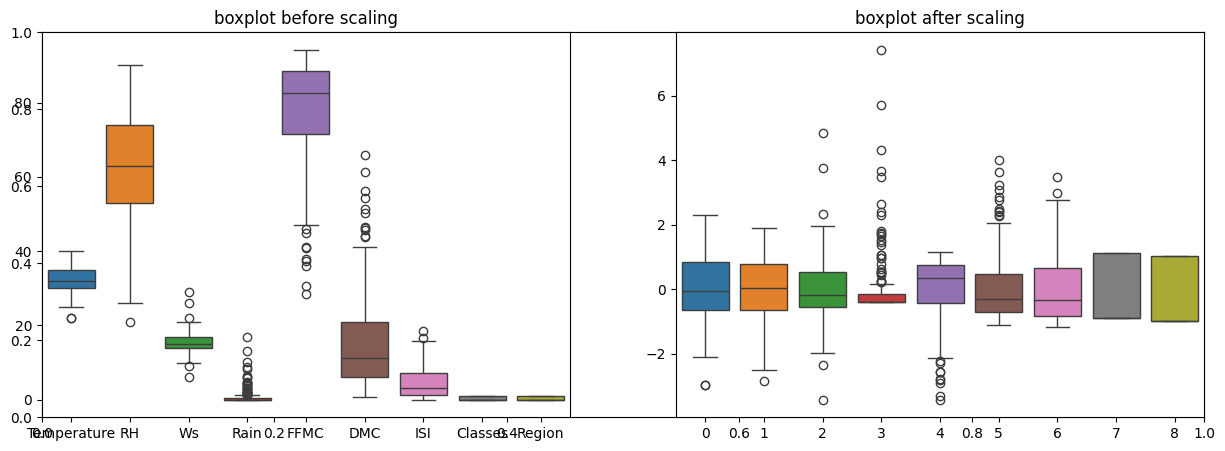

In [67]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('boxplot before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('boxplot after scaling')
plt.show();

# Linear Regression Model

mean absolute score is: 0.9430609420315061
r2 score is: 0.8964024836963291


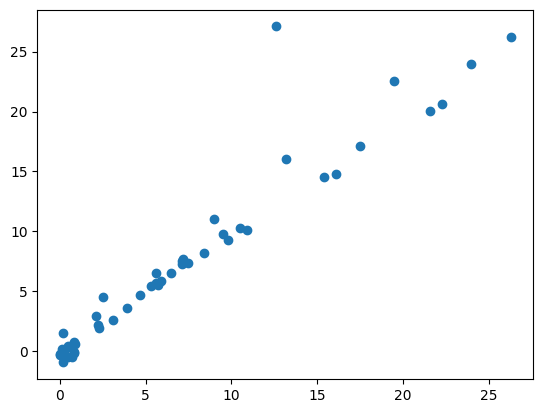

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('mean absolute score is:', mae)
print('r2 score is:', score)
plt.scatter(y_test, y_pred)

Mean Absolute error is: 1.2462790051291617
R2 Score is: 0.9141728765575938


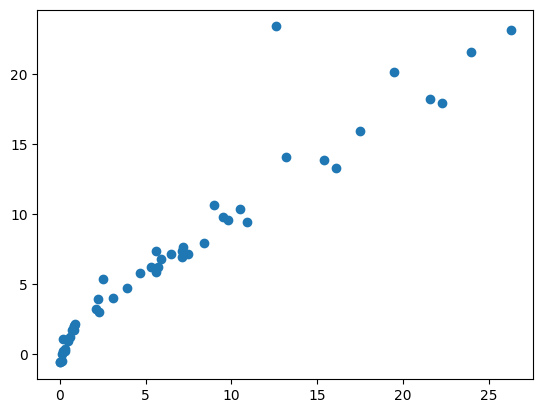

In [69]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred1=lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred1)
score = r2_score(y_test, y_pred1)
print('Mean Absolute error is:', mae)
print('R2 Score is:', score)
plt.scatter(y_test, y_pred1)

In [70]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [71]:
lassocv.alpha_

np.float64(0.016181501530953737)

In [72]:
lassocv.alphas_

array([7.00458573, 6.5325001 , 6.09223145, 5.68163544, 5.29871223,
       4.94159676, 4.60854968, 4.29794885, 4.00828148, 3.73813673,
       3.48619882, 3.25124069, 3.03211795, 2.82776335, 2.63718156,
       2.45944435, 2.29368603, 2.13909927, 1.99493114, 1.86047946,
       1.73508937, 1.61815015, 1.50909225, 1.40738448, 1.31253148,
       1.22407125, 1.14157294, 1.06463475, 0.99288193, 0.92596501,
       0.86355807, 0.80535714, 0.75107877, 0.70045857, 0.65325001,
       0.60922315, 0.56816354, 0.52987122, 0.49415968, 0.46085497,
       0.42979489, 0.40082815, 0.37381367, 0.34861988, 0.32512407,
       0.30321179, 0.28277633, 0.26371816, 0.24594444, 0.2293686 ,
       0.21390993, 0.19949311, 0.18604795, 0.17350894, 0.16181502,
       0.15090922, 0.14073845, 0.13125315, 0.12240712, 0.11415729,
       0.10646347, 0.09928819, 0.0925965 , 0.08635581, 0.08053571,
       0.07510788, 0.07004586, 0.065325  , 0.06092231, 0.05681635,
       0.05298712, 0.04941597, 0.0460855 , 0.04297949, 0.04008

In [73]:
lassocv.mse_path_

array([[74.99360441, 45.86333957, 62.60386082, 40.73628771, 51.69921456],
       [73.30907988, 39.98208192, 61.01013808, 36.36213791, 46.39825505],
       [65.89345115, 34.75265126, 53.3499299 , 32.34842422, 41.74941576],
       [59.40442842, 30.21808927, 46.29074913, 28.38106597, 37.67034104],
       [53.72396816, 26.28689984, 40.16555207, 24.92552321, 33.22042876],
       [48.74922365, 22.87971888, 34.85168005, 21.91538293, 29.21719401],
       [44.39057764, 19.92744548, 30.24257747, 19.29294676, 25.7237966 ],
       [39.75957835, 17.37003222, 26.24558112, 17.00780863, 22.67465128],
       [34.89249707, 15.15544401, 22.78014956, 15.01671532, 20.01261941],
       [30.64983134, 13.23832676, 19.77634832, 13.28141954, 17.68762361],
       [26.95057536, 11.57932675, 17.17333897, 11.76884214, 15.65705608],
       [23.72456938, 10.14422298, 14.91827475, 10.45019661, 13.88282812],
       [20.9107505 ,  8.90339666, 12.96521158,  9.30043091, 12.33209989],
       [18.45526895,  7.8310112 , 11.2

Mean Absolute error is: 0.9356656692075517
R2 Score is: 0.8982847653247382


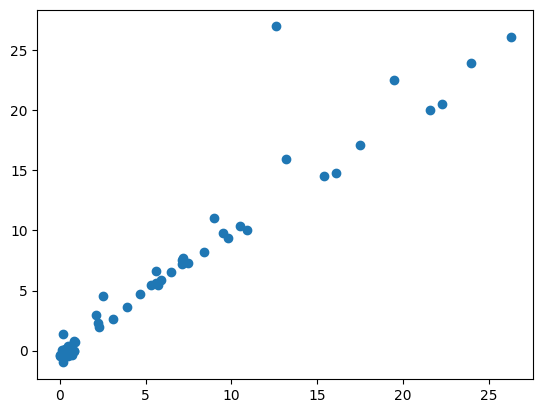

In [74]:
y_pred2 = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred2)
score = r2_score(y_test, y_pred2)
print('Mean Absolute error is:', mae)
print('R2 Score is:', score)
plt.scatter(y_test, y_pred2)

Mean absolute score: 0.9457840568647774
R2 Score: 0.8993422837173635


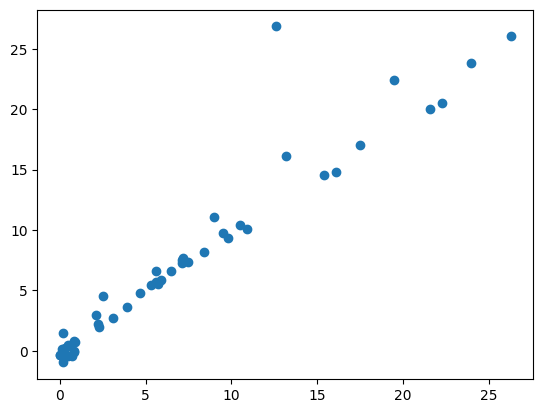

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred3 = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred3)
score = r2_score(y_test, y_pred3)
print("Mean absolute score:", mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred3)

Mean absolute score: 0.9432719549987242
R2 Score: 0.8967136223596286


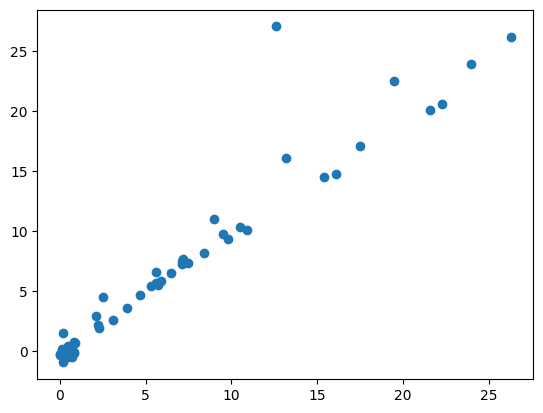

In [76]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred4 = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred4)
score = r2_score(y_test, y_pred4)
print("Mean absolute score:", mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred4)

Mean absolute score: 0.9432719549987242
R2 Score: 0.8967136223596286


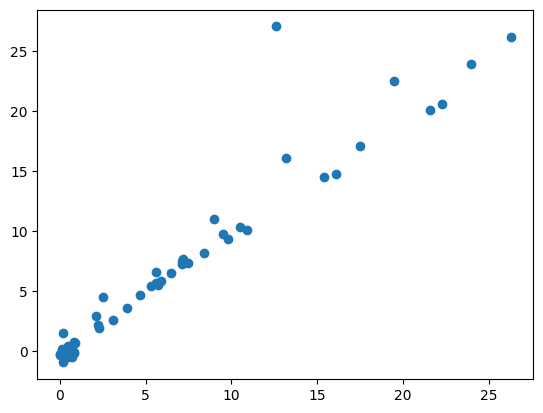

In [77]:
from sklearn.linear_model import ElasticNet

elasticnet = RidgeCV(cv=5)
elasticnet.fit(X_train_scaled, y_train)
y_pred5 = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred5)
score = r2_score(y_test, y_pred5)
print("Mean absolute score:", mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred5)

Mean absolute score: 0.9460104172810869
R2 Score: 0.9010676656981348


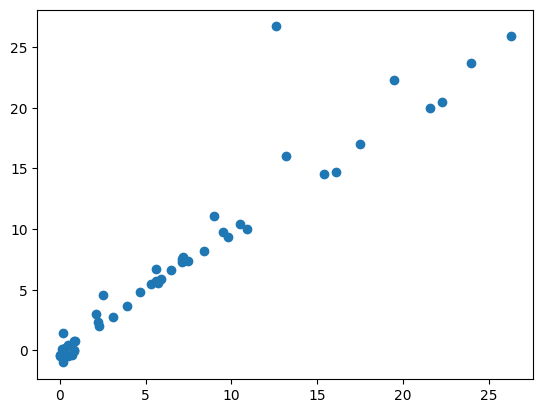

In [78]:
from sklearn.linear_model import ElasticNetCV

elasticnetCV = ElasticNetCV(cv=5)
elasticnetCV.fit(X_train_scaled, y_train)
y_pred6 = elasticnetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred6)
score = r2_score(y_test, y_pred6)
print("Mean absolute score:", mae)
print('R2 Score:', score)
plt.scatter(y_test, y_pred6)

In [79]:
elasticnetCV.alphas_

array([14.00917146, 13.06500019, 12.1844629 , 11.36327088, 10.59742446,
        9.88319352,  9.21709935,  8.59589771,  8.01656297,  7.47627346,
        6.97239765,  6.50248138,  6.0642359 ,  5.6555267 ,  5.27436313,
        4.9188887 ,  4.58737207,  4.27819854,  3.98986228,  3.72095892,
        3.47017874,  3.23630031,  3.0181845 ,  2.81476896,  2.62506296,
        2.4481425 ,  2.28314589,  2.1292695 ,  1.98576386,  1.85193002,
        1.72711614,  1.61071429,  1.50215754,  1.40091715,  1.30650002,
        1.21844629,  1.13632709,  1.05974245,  0.98831935,  0.92170994,
        0.85958977,  0.8016563 ,  0.74762735,  0.69723976,  0.65024814,
        0.60642359,  0.56555267,  0.52743631,  0.49188887,  0.45873721,
        0.42781985,  0.39898623,  0.37209589,  0.34701787,  0.32363003,
        0.30181845,  0.2814769 ,  0.2625063 ,  0.24481425,  0.22831459,
        0.21292695,  0.19857639,  0.185193  ,  0.17271161,  0.16107143,
        0.15021575,  0.14009171,  0.13065   ,  0.12184463,  0.11

# Pickle the ML Models and prepreocessing model StandardScaler

In [82]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(elasticnetCV, open('elasticnetCV.pkl', 'wb'))
pickle.dump(ridgecv, open('ridgeCV.pkl', 'wb'))
pickle.dump(lasso, open('lassoCV.pkl', 'wb'))